# **DataSet World Energy Consumption**


## Reorganizar el DataSet
Para continuar se debe realizar el cargue manual del dataset en el space del google coolab.
Luego de tener el dataset cargado se debe correr las siguientes lineas para eliminar columnas y filas que no se requieren.


In [ ]:
# Cargue del archivo y de las librerias
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline

# En esta linea se pone la ubicación del data set.
d = pd.read_csv("/content/World Energy Consumption.csv")
d.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Se seleccionan las columnas y los años de interes.
## Tambien se convierten las variables de númericas a categoricas.

In [ ]:
# Selección y filtrado de data de interes
columns = [
    'country', 'year', 'energy_cons_change_pct', 'energy_cons_change_twh',
    'electricity_generation', 'hydro_electricity', 'nuclear_electricity',
    'other_renewable_electricity', 'renewables_electricity',
    'solar_electricity', 'wind_electricity', 'energy_per_gdp',
    'energy_per_capita', 'hydro_share_elec', 'low_carbon_share_elec',
    'low_carbon_electricity', 'low_carbon_elec_per_capita',
    'low_carbon_share_energy', 'low_carbon_energy_per_capita',
    'other_renewables_elec_per_capita', 'other_renewables_share_elec', 'other_renewables_share_energy',
    'other_renewables_cons_change_twh', 'other_renewables_energy_per_capita',
    'per_capita_electricity', 'population',
    'primary_energy_consumption', 'renewables_elec_per_capita',
    'renewables_share_elec', 'renewables_cons_change_pct',
    'renewables_share_energy', 'renewables_cons_change_twh',
    'renewables_consumption', 'renewables_energy_per_capita',
    'solar_share_elec', 'solar_cons_change_pct',
    'solar_share_energy','gdp'
]


datasetColumnas= d[columns]

ds_filtrado = datasetColumnas[(datasetColumnas['year'] >= 1998) & (datasetColumnas['year'] <= 2020)]

# Conversión de columnas numericas a categoricas

columnsCategoricas = [
    'hydro_share_elec', 'low_carbon_share_elec', 'low_carbon_share_energy', 'other_renewables_share_elec','other_renewables_share_energy', 'renewables_share_elec',
    'renewables_share_energy', 'solar_share_elec', 'solar_share_energy'
]
for column in columnsCategoricas:
    max_value = ds_filtrado[column].max()
    threshold1 = max_value / 3
    threshold2 = 2 * threshold1

    conditions = [
        (ds_filtrado[column] <= threshold1),
        (ds_filtrado[column] > threshold1) & (ds_filtrado[column] <= threshold2),
        (ds_filtrado[column] > threshold2)
    ]

    categories = ['bajo', 'medio', 'alto']

    ds_filtrado[column + '_cat'] = np.select(conditions, categories, default='N/A')

#Se elimina las originales y se dejan las convertidas en categoricas

for column in columnsCategoricas:
    # Elimina la columna original
    ds_filtrado = ds_filtrado.drop(column, axis=1)

    # Renombra la columna categórica para que tenga el nombre original
    ds_filtrado = ds_filtrado.rename(columns={column + '_cat': column})

print(ds_filtrado.shape)
d=ds_filtrado
d

(5328, 38)


<ipython-input-62-0221dee24cda>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_filtrado[column + '_cat'] = np.select(conditions, categories, default='N/A')
<ipython-input-62-0221dee24cda>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_filtrado[column + '_cat'] = np.select(conditions, categories, default='N/A')
<ipython-input-62-0221dee24cda>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,country,year,energy_cons_change_pct,energy_cons_change_twh,electricity_generation,hydro_electricity,nuclear_electricity,other_renewable_electricity,renewables_electricity,solar_electricity,...,gdp,hydro_share_elec,low_carbon_share_elec,low_carbon_share_energy,other_renewables_share_elec,other_renewables_share_energy,renewables_share_elec,renewables_share_energy,solar_share_elec,solar_share_energy
98,Afghanistan,1998,-2.669,-0.181,NaN,NaN,NaN,NaN,NaN,NaN,...,1.836291e+10,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
99,Afghanistan,1999,-0.093,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,...,1.747612e+10,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
100,Afghanistan,2000,-12.633,-0.835,0.467,0.312,0.0,0.000,0.312,0.000,...,1.650883e+10,alto,alto,N/A,bajo,N/A,alto,N/A,bajo,N/A
101,Afghanistan,2001,-22.419,-1.295,0.592,0.498,0.0,0.000,0.498,0.000,...,1.557484e+10,alto,alto,N/A,bajo,N/A,alto,N/A,bajo,N/A
102,Afghanistan,2002,-4.909,-0.220,0.687,0.555,0.0,0.000,0.555,0.000,...,2.567680e+10,alto,alto,N/A,bajo,N/A,alto,N/A,bajo,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,Zimbabwe,2015,-0.789,-0.443,9.388,4.940,0.0,0.128,5.076,0.008,...,2.503057e+10,medio,medio,N/A,bajo,N/A,medio,N/A,bajo,N/A
17428,Zimbabwe,2016,-14.633,-8.142,6.826,2.955,0.0,0.147,3.111,0.009,...,2.515176e+10,medio,medio,N/A,bajo,N/A,medio,N/A,bajo,N/A
17429,Zimbabwe,2017,NaN,NaN,7.310,3.929,0.0,0.151,4.091,0.011,...,NaN,medio,medio,N/A,bajo,N/A,medio,N/A,bajo,N/A
17430,Zimbabwe,2018,NaN,NaN,9.133,5.000,0.0,0.187,5.201,0.014,...,NaN,medio,medio,N/A,bajo,N/A,medio,N/A,bajo,N/A


## Se valida el tipo de cada columna

In [ ]:
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

             country object
                year int64
energy_cons_change_pct float64
energy_cons_change_twh float64
electricity_generation float64
   hydro_electricity float64
 nuclear_electricity float64
other_renewable_electricity float64
renewables_electricity float64
   solar_electricity float64
    wind_electricity float64
      energy_per_gdp float64
   energy_per_capita float64
low_carbon_electricity float64
low_carbon_elec_per_capita float64
other_renewables_elec_per_capita float64
per_capita_electricity float64
          population float64
primary_energy_consumption float64
renewables_elec_per_capita float64
                 gdp float64
    hydro_share_elec object
low_carbon_share_elec object
low_carbon_share_energy object
other_renewables_share_elec object
other_renewables_share_energy object
renewables_share_elec object
renewables_share_energy object
    solar_share_elec object
  solar_share_energy object


## Evaluación de la variable objetivo "renewables_elec_per_capita"
Consumo per cápita de energía primaria a partir de fuentes renovables (kilovatios-hora)

<ipython-input-63-22e82f5125b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['renewables_elec_per_capita'])


<Axes: xlabel='renewables_elec_per_capita', ylabel='Density'>

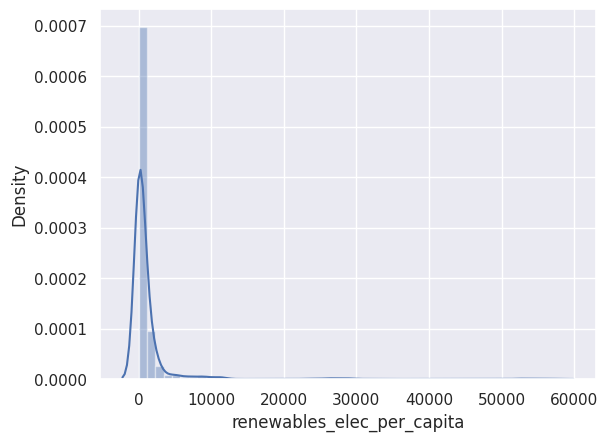

In [ ]:
sns.distplot(d['renewables_elec_per_capita'])

Skewness de la variable objetivo -1.1220956095661592


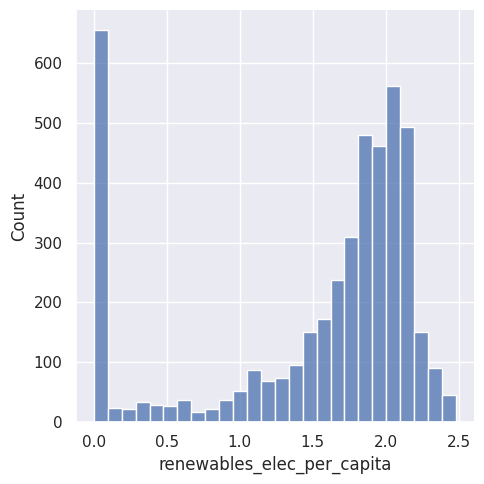

In [ ]:
#transformación logaritmica de la variable objetivo ya que presenta una asimetria muy pronunciada hacia la izquierda.
d.loc[:,'renewables_elec_per_capita']=np.log1p(d['renewables_elec_per_capita'])

## Se valida la correlacción entre varias columnas significativas

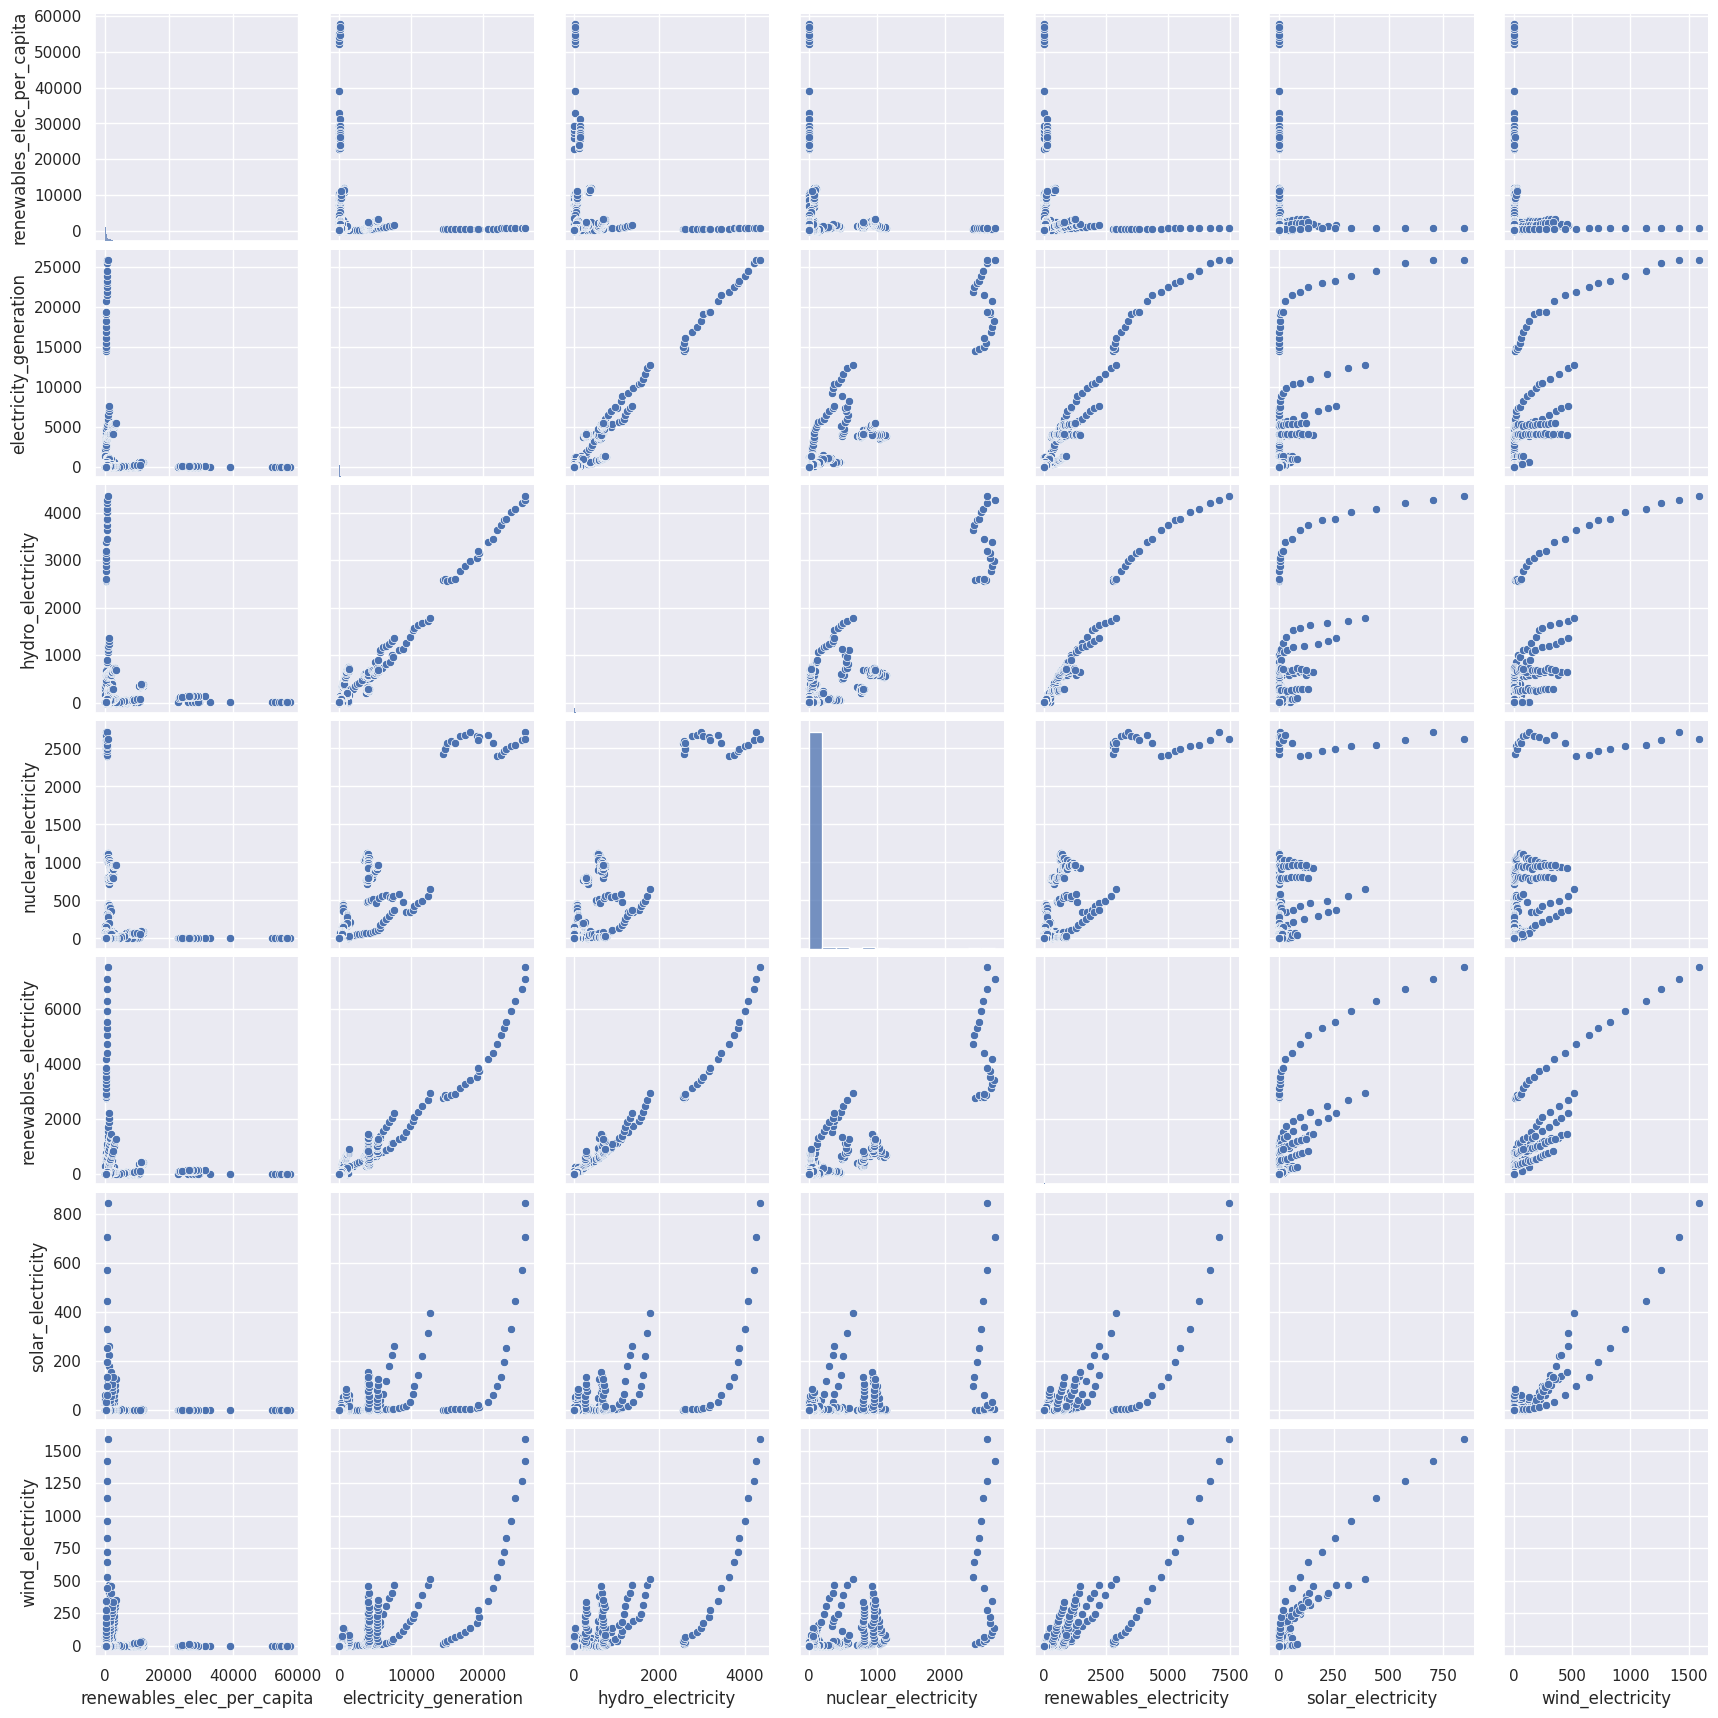

In [ ]:
cols = ['renewables_elec_per_capita', 'electricity_generation', 'hydro_electricity', 'nuclear_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity']
sns.set()
sns.pairplot(d[cols])

## Matriz de correlación

<ipython-input-41-ceed1400e054>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d.corr()


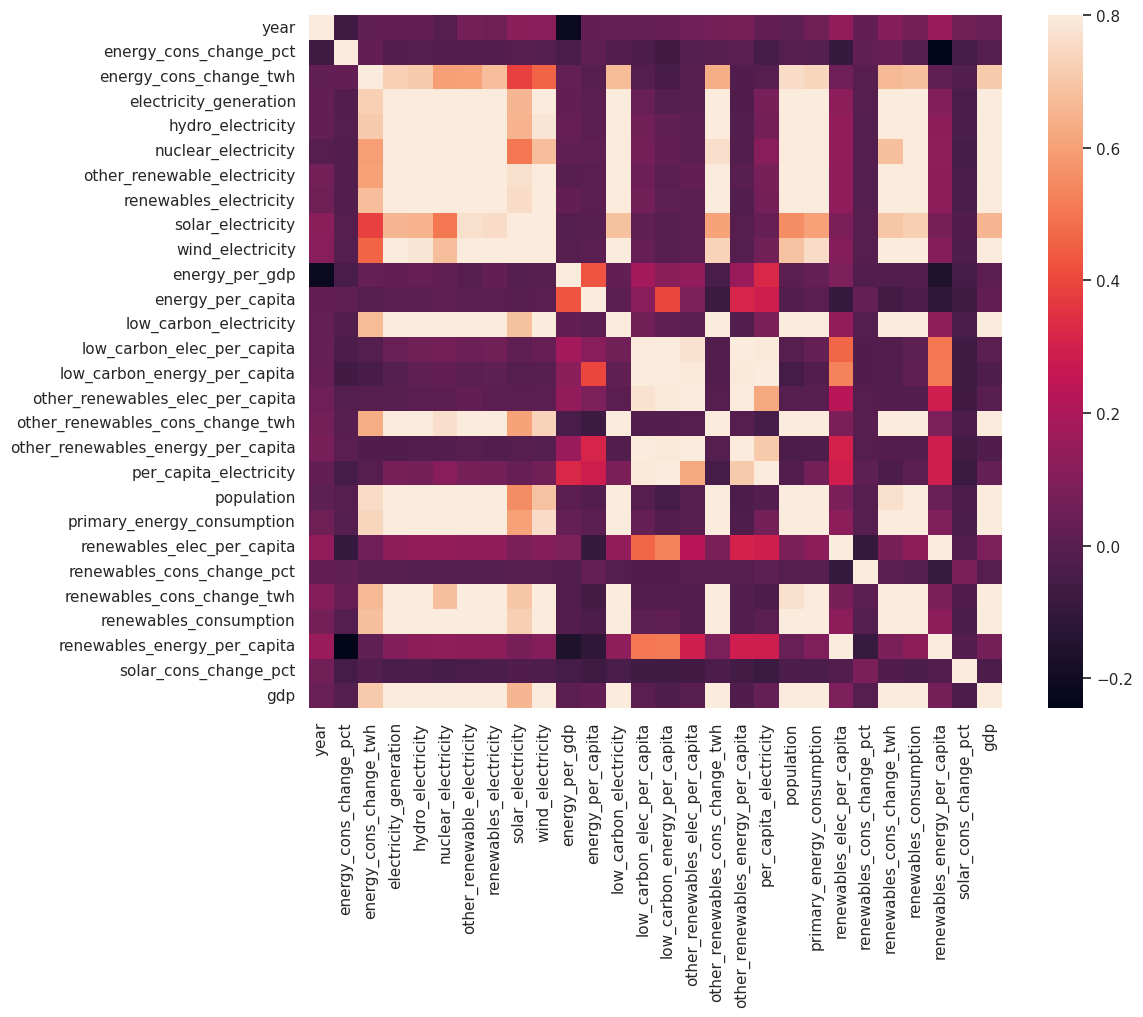

In [ ]:
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Visión general de los datos faltantes

Variables con datos faltantes energy_cons_change_pct                 550
energy_cons_change_twh                 531
electricity_generation                 481
hydro_electricity                      481
nuclear_electricity                    481
other_renewable_electricity            503
renewables_electricity                 503
solar_electricity                      481
wind_electricity                       481
energy_per_gdp                        2166
energy_per_capita                      983
low_carbon_electricity                 503
low_carbon_elec_per_capita             893
low_carbon_energy_per_capita          3502
other_renewables_elec_per_capita       893
other_renewables_cons_change_twh      3502
other_renewables_energy_per_capita    3502
per_capita_electricity                 893
population                             580
primary_energy_consumption             527
renewables_elec_per_capita             893
renewables_cons_change_pct            3587
renewables_cons_change_t

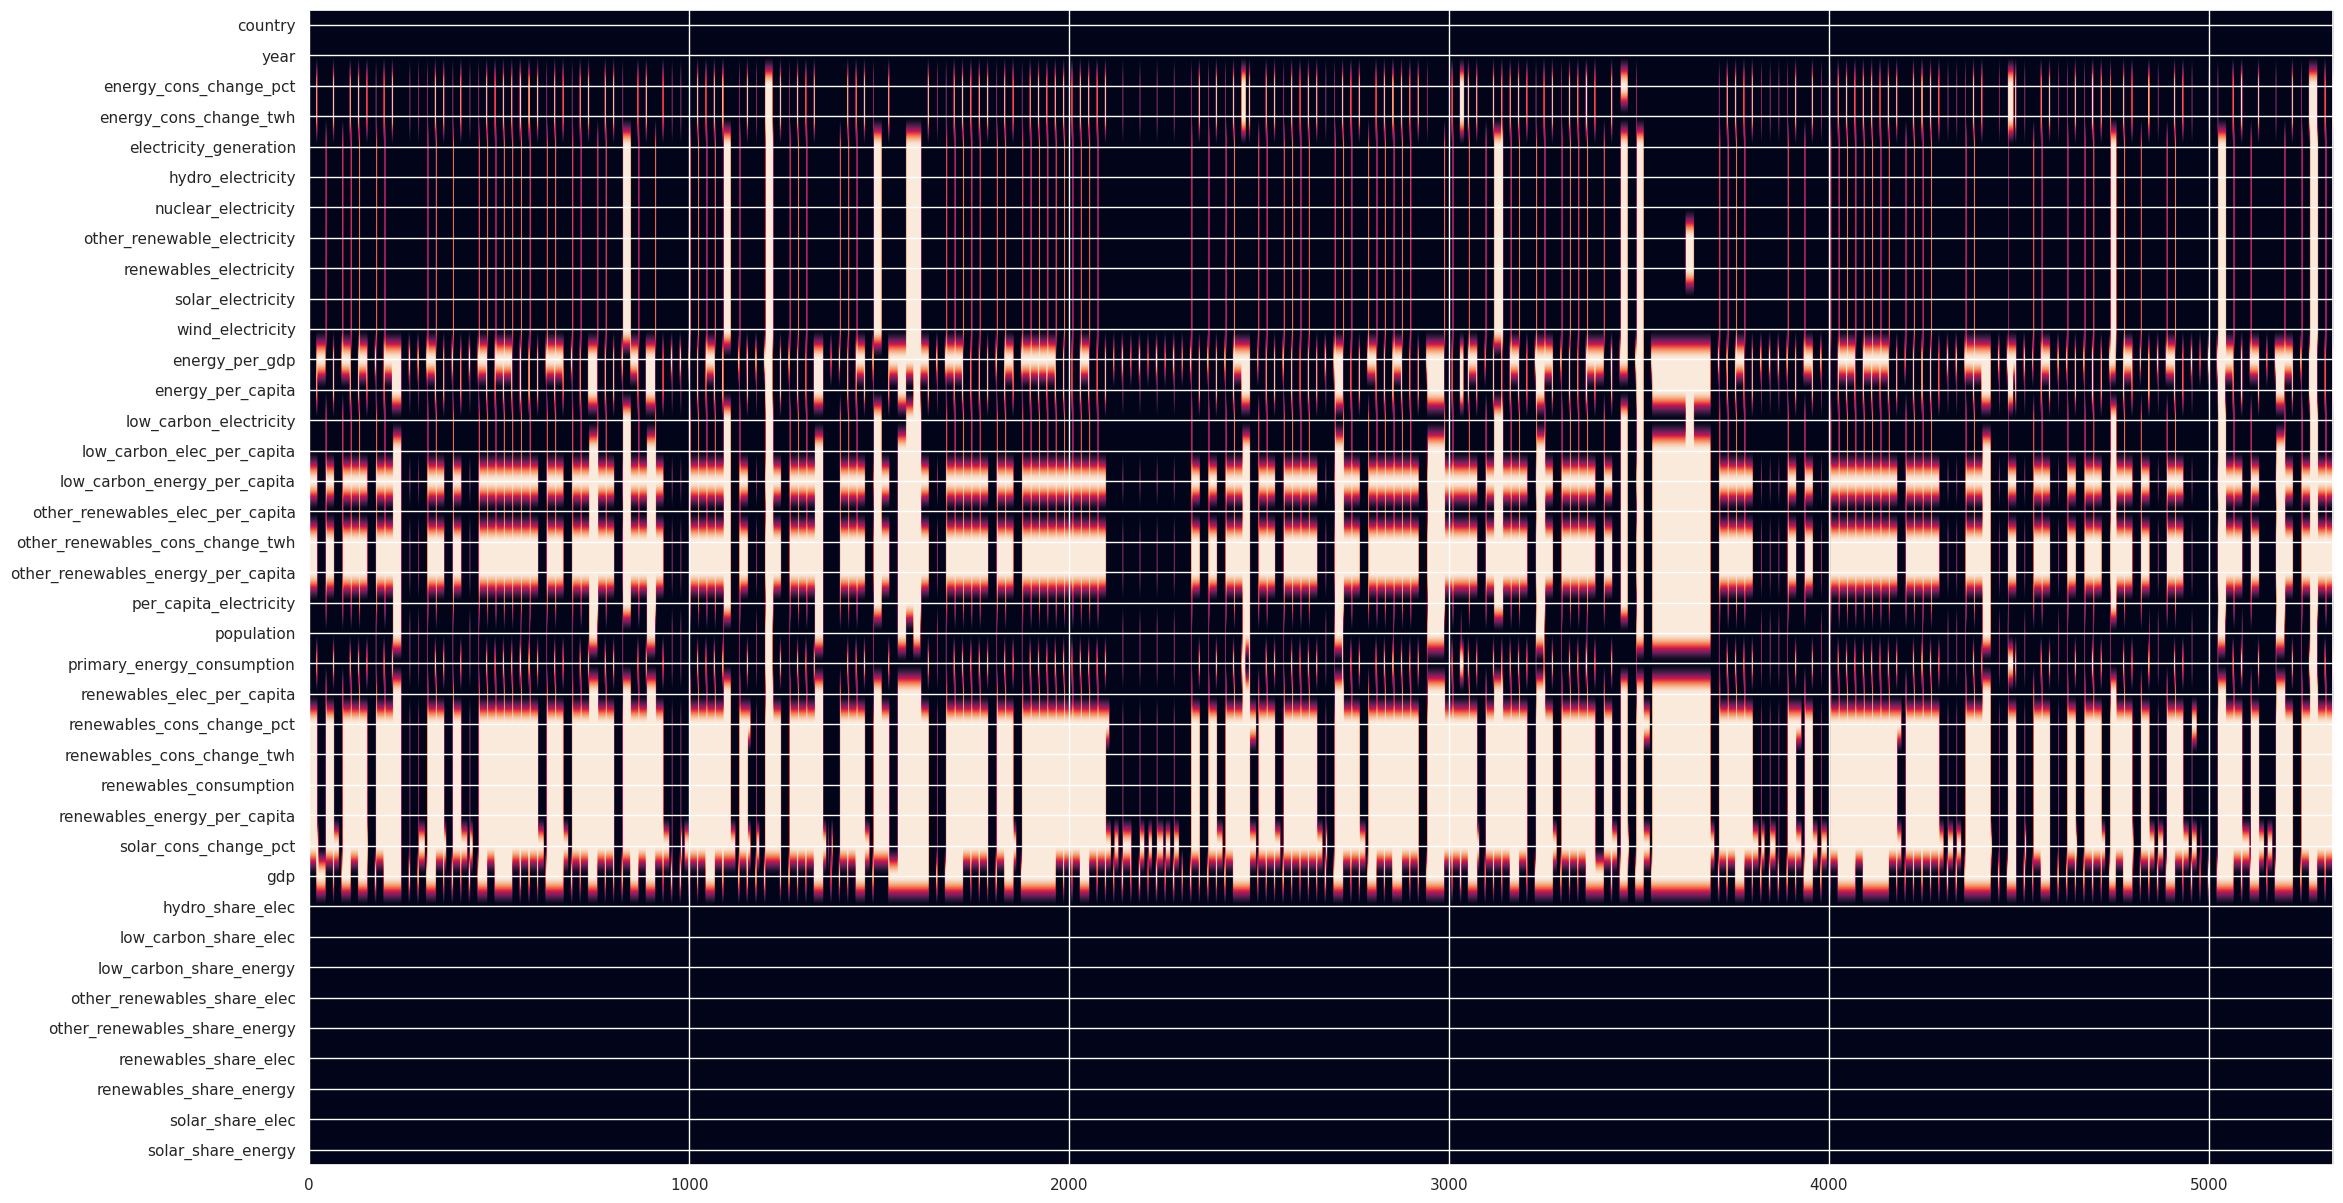

In [ ]:
k = d.isna().sum()
print("Variables con datos faltantes", k[k!=0])
print("Variables sin datos faltantes", k[k==0])
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(d.isna().values.T)
ax.set_aspect(80)
plt.yticks(range(d.shape[1]), d.columns);

## Se elimina las columnas con alta cantidad de datos faltantes
Para lo cual se eliminaron 3 columnas con el 40 % de datos faltantes

In [ ]:
criterio = len(d) * 0.4 #criterio para eliminar la columnas (El 40 % de estas)
d.dropna(axis=1, thresh = criterio, inplace = True)  #eliminación de las columnas con 50% o más de datos faltantes
print('Cantidad de datos y columnas: ',d.shape)
d.columns

Cantidad de datos y columnas:  (5328, 30)


Index(['country', 'year', 'energy_cons_change_pct', 'energy_cons_change_twh',
       'electricity_generation', 'hydro_electricity', 'nuclear_electricity',
       'other_renewable_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_gdp',
       'energy_per_capita', 'low_carbon_electricity',
       'low_carbon_elec_per_capita', 'other_renewables_elec_per_capita',
       'per_capita_electricity', 'population', 'primary_energy_consumption',
       'renewables_elec_per_capita', 'gdp', 'hydro_share_elec',
       'low_carbon_share_elec', 'low_carbon_share_energy',
       'other_renewables_share_elec', 'other_renewables_share_energy',
       'renewables_share_elec', 'renewables_share_energy', 'solar_share_elec',
       'solar_share_energy'],
      dtype='object')

Se eliminan las variables
‘low_carbon_energy_per_capita’
‘other_renewables_cons_change_twh’
‘other_renewables_energy_per_capita’
‘renewables_cons_change_pct’
‘renewables_cons_change_twh’
‘renewables_consumption’
‘renewables_energy_per_capita’
‘solar_cons_change_pct’

Ya que tenian más del 40% de datos faltates.

Series([], dtype: int64)


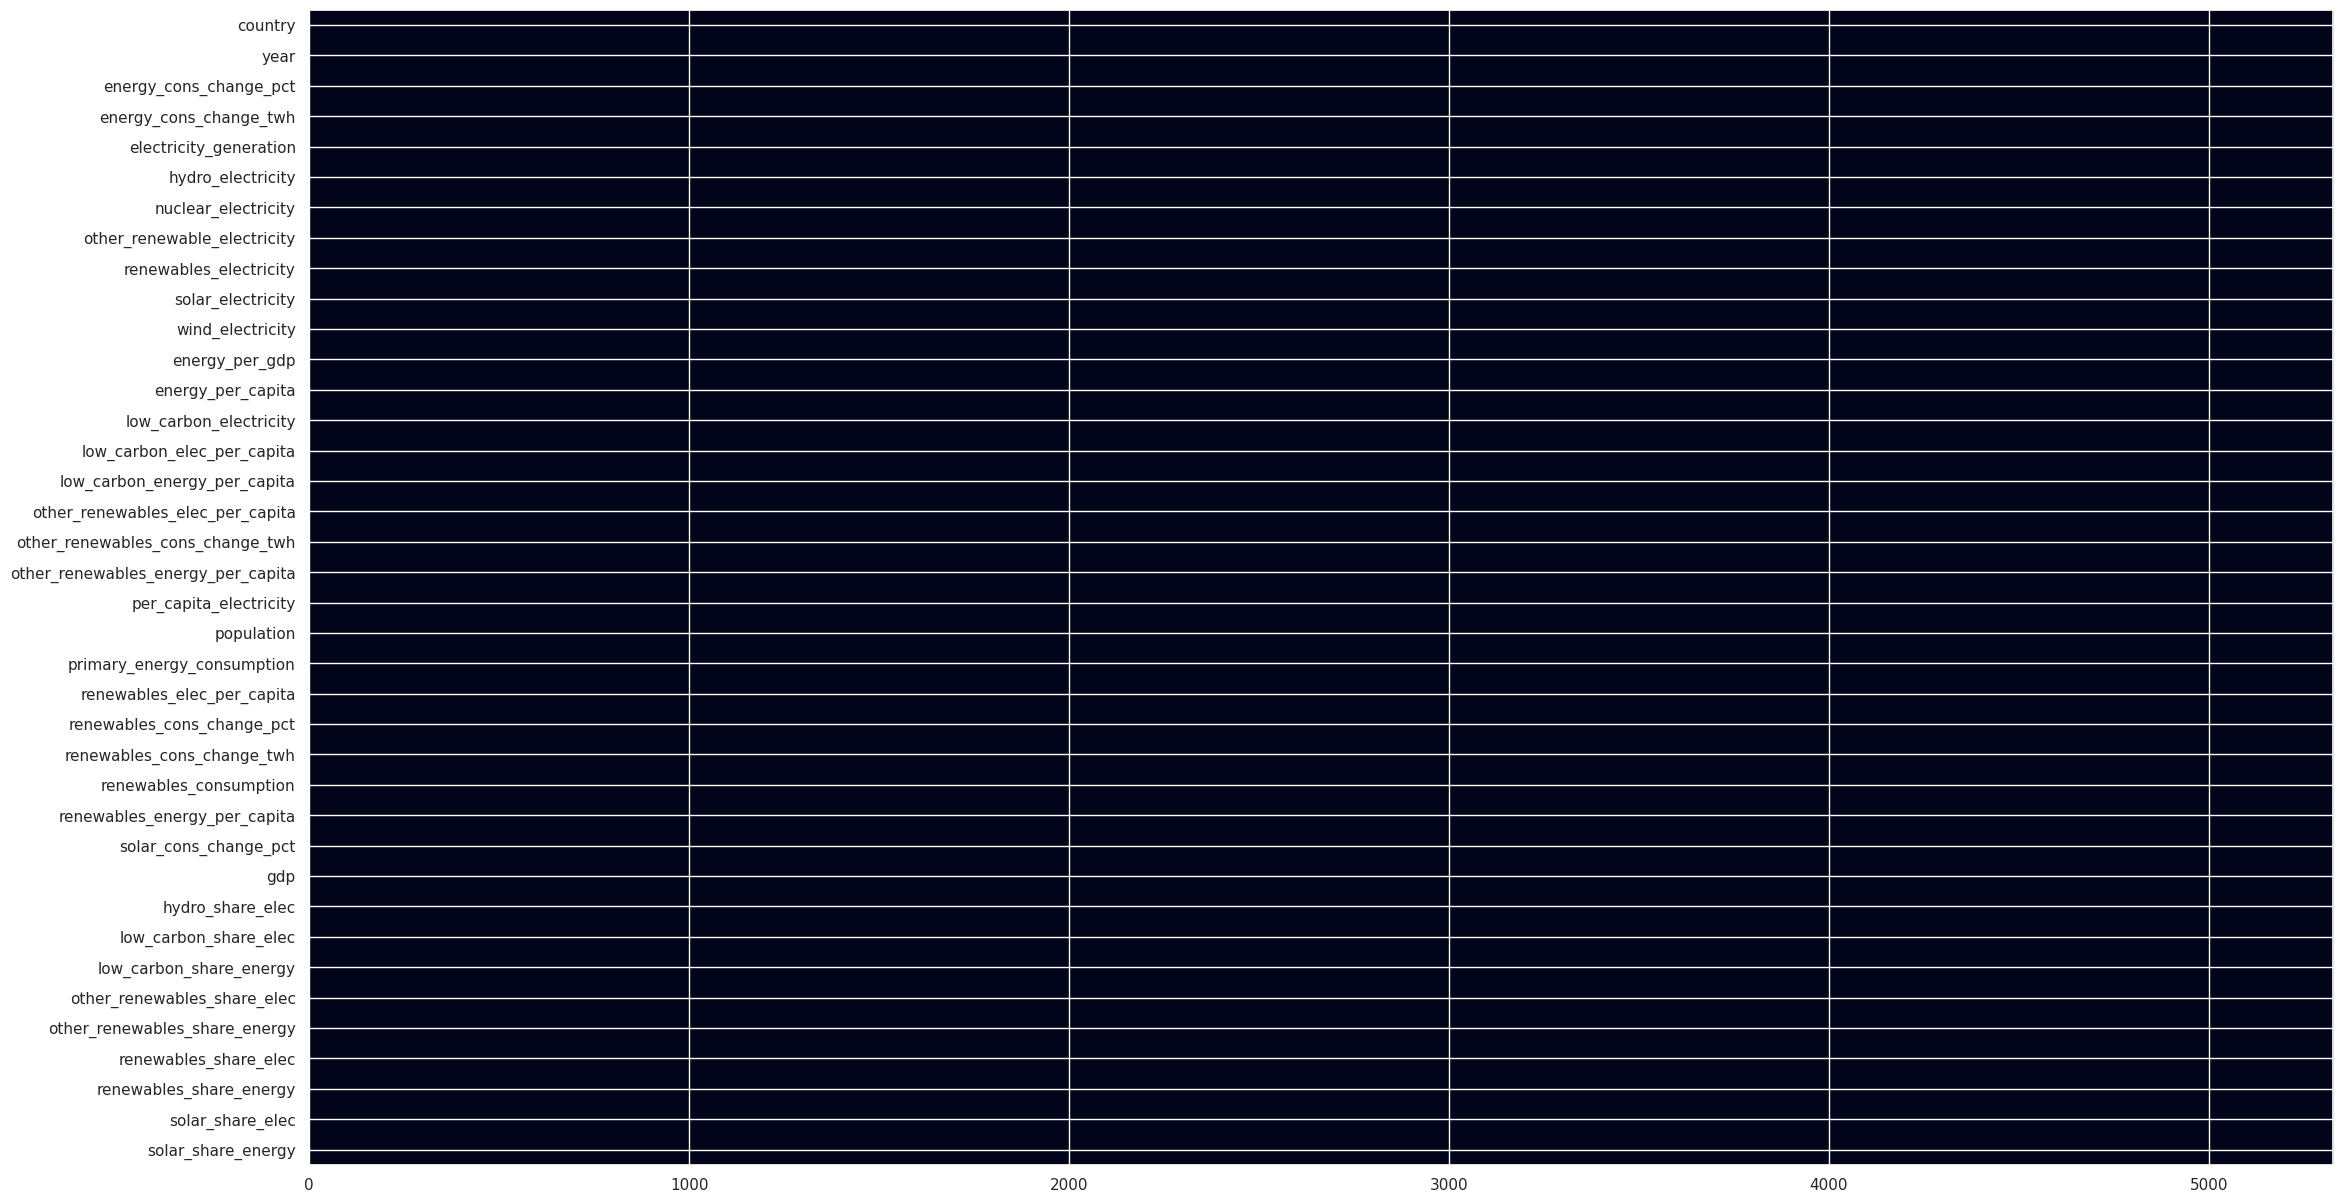

In [ ]:
k = d.isna().sum()
print(k[k!=0])
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(d.isna().values.T)
ax.set_aspect(80)
plt.yticks(range(d.shape[1]), d.columns);

In [ ]:
nulls=d.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        d[i].ffill(inplace=True)
        d[i].bfill(inplace=True)
d.isna().sum()

country                               0
year                                  0
energy_cons_change_pct                0
energy_cons_change_twh                0
electricity_generation                0
hydro_electricity                     0
nuclear_electricity                   0
other_renewable_electricity           0
renewables_electricity                0
solar_electricity                     0
wind_electricity                      0
energy_per_gdp                        0
energy_per_capita                     0
low_carbon_electricity                0
low_carbon_elec_per_capita            0
low_carbon_energy_per_capita          0
other_renewables_elec_per_capita      0
other_renewables_cons_change_twh      0
other_renewables_energy_per_capita    0
per_capita_electricity                0
population                            0
primary_energy_consumption            0
renewables_elec_per_capita            0
renewables_cons_change_pct            0
renewables_cons_change_twh            0
